In [71]:
BiocManager::install("fgsea")

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.0 (2019-04-26)

Installing package(s) 'fgsea'

Warning message in install.packages(...):
“installation of package ‘fgsea’ had non-zero exit status”
Installation path not writeable, unable to update packages: ellipsis, fansi,
  repr, BH, Cairo, digest, evaluate, htmltools, httpuv, knitr, later, markdown,
  mime, promises, Rcpp, rJava, rmarkdown, shiny, stringi, tinytex, yaml

Old packages: 'backports', 'bit', 'bit64', 'broom', 'callr', 'cli', 'clipr',
  'colorspace', 'data.table', 'dbplyr', 'dplyr', 'forcats', 'fs', 'generics',
  'ggplot2', 'ggrepel', 'glue', 'haven', 'hdf5r', 'htmlwidgets', 'httr',
  'IRkernel', 'isoband', 'jsonlite', 'labeling', 'lubridate', 'MASS',
  'matrixStats', 'mgcv', 'modelr', 'nlme', 'openssl', 'pbdZMQ', 'pillar',
  'pkgbuild', 'processx', 'ps', 'R6', 'RcppAnnoy', 'readr', 'remotes', 'renv',
  'reticulate', 'rlang', 'rprojroot', 'RSQLite', 'rstudioapi', 'rvest', 'sys',
  'systemfonts', 'testthat', 'tibble'

In [112]:
library(tidyverse)
library(ggrepel)
library(fgsea)
library(msigdbr)

Warning message:
“package ‘msigdbr’ was built under R version 3.6.1”


In [73]:
qc_table <- read_tsv("expression_matrix.hg38.fa.transcript.qc.txt")

Parsed with column specification:
cols(
  .default = col_double(),
  compartment = col_character()
)

See spec(...) for full column specifications.



In [74]:
metadata <- read_csv("metadata.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  AvgSpotLen = col_double(),
  Bases = col_double(),
  Bytes = col_double(),
  ReleaseDate = col_datetime(format = ""),
  Age = col_double()
)

See spec(...) for full column specifications.



In [75]:
metadata

Directory,SRA,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,⋯,TISSUE,Age,Biomaterial_provider,Cell_Line,disease,disease_stage,ETHNICITY,Isolate,Library Name,SAMPLE_TYPE
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SRR5024081,SRR5024081,RNA-Seq,150,2914430850,PRJNA353646,SAMN06018691,1172608754,GEO,public,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SRR5024082,SRR5024082,RNA-Seq,150,2903656650,PRJNA353646,SAMN06018690,1175545174,GEO,public,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SRR5024083,SRR5024083,RNA-Seq,150,3044338200,PRJNA353646,SAMN06018689,1223624509,GEO,public,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SRR5024084,SRR5024084,RNA-Seq,150,3177861750,PRJNA353646,SAMN06018688,1288841071,GEO,public,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SRR5024085,SRR5024085,RNA-Seq,150,2857359900,PRJNA353646,SAMN06018687,1155198798,GEO,public,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SRR5024086,SRR5024086,RNA-Seq,150,2896688700,PRJNA353646,SAMN06018686,1176014081,GEO,public,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SRR5024087,SRR5024087,RNA-Seq,150,2952129450,PRJNA353646,SAMN06018685,1191981253,GEO,public,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SRR5024088,SRR5024088,RNA-Seq,150,2766219300,PRJNA353646,SAMN06018684,1128938330,GEO,public,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SRR5024089,SRR5024089,RNA-Seq,150,2666902650,PRJNA353646,SAMN06018683,1082569415,GEO,public,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [76]:
qc_table

compartment,GSM2392606,GSM2392607,GSM2392608,GSM2392609,GSM2392610,GSM2392611,GSM2392612,GSM2392613,GSM2392614,⋯,GSM2392620,GSM2392621,GSM2392622,GSM2392623,GSM2392624,GSM2392625,GSM2392626,GSM2392627,GSM2392628,GSM2392629
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
exonic,82.103775,80.531520,83.403413,84.842217,88.960403,86.692298,84.555882,84.949976,89.542091,⋯,81.42812,85.038843,87.254303,86.874582,87.221928,88.865360,90.696621,88.192322,90.382594,90.348800
intronic,11.259088,12.129316,10.198965,9.418415,6.858758,8.327740,9.830206,9.661151,6.644176,⋯,11.28420,9.219687,7.666887,8.072776,7.822846,6.770306,5.612881,7.162465,5.926212,5.993623
intergenic,6.637137,7.339164,6.397622,5.739368,4.180839,4.979962,5.613912,5.388873,3.813734,⋯,7.28768,5.741470,5.078810,5.052642,4.955226,4.364334,3.690498,4.645213,3.691194,3.657577


Joining, by = "SampleID"



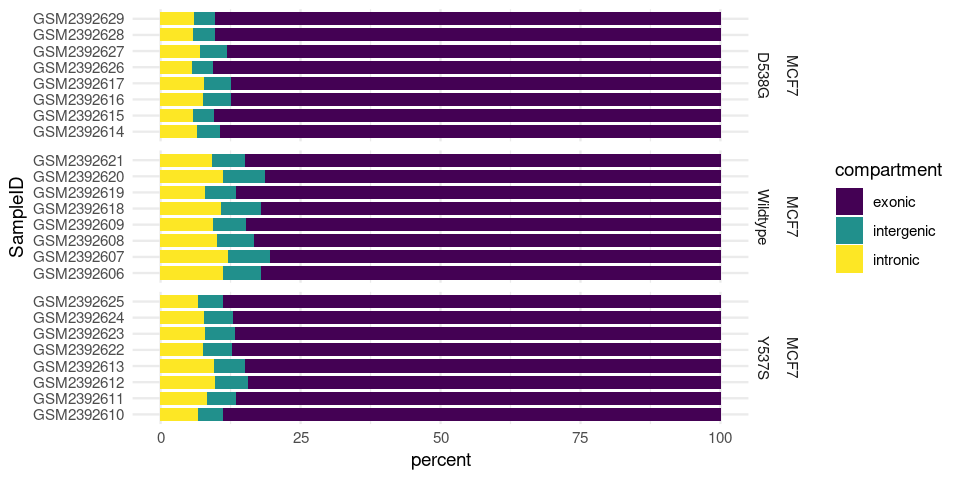

In [77]:
options(repr.plot.width=8, repr.plot.height=4)
tidyr::gather(qc_table, "SampleID", "percent", -c(compartment)) %>%
    left_join(metadata) %>%
    filter(BioProject == "PRJNA353646") %>%
    ggplot(aes(SampleID, percent, fill=compartment, width=0.75)) +
        geom_bar(stat="identity") +
        facet_grid(source_name + Genotype ~ ., scales = "free", space = "free") + 
        coord_flip() +
        scale_fill_viridis_d() + 
        theme_minimal()

In [78]:
ggsave("qc_plot.png", device="png", height=4)

Saving 6.67 x 4 in image



In [79]:
tpm_pisces <- read_tsv("expression_matrix.hg38.fa.TPM.TMM-scaled.txt") %>%
  full_join(read_tsv("expression_matrix_exonic.hg38.fa.TPM.TMM-scaled.txt"), by=c("gene_id"="gene_id"))

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character()
)

See spec(...) for full column specifications.



In [80]:
counts_pisces_intron <- read_tsv("expression_matrix.hg38.fa.introns.counts.txt") %>% 
  tidyr::separate(gene_id, c("prefix", "gene_id"), sep="_") %>% 
  select(-c(prefix)) %>%
  tidyr::gather("SampleID", "counts", -c(gene_id)) %>%  
  group_by(gene_id) %>% 
  filter(!is.na(counts)) %>%
  summarize("mediancounts" = median(counts))

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)

See spec(...) for full column specifications.

Warning message:
“Expected 2 pieces. Additional pieces discarded in 34 rows [37267, 37268, 37269, 37270, 37271, 37272, 37273, 37274, 37275, 37276, 37277, 37278, 37279, 37280, 37281, 37282, 37283, 37284, 37285, 37286, ...].”
`summarise()` ungrouping output (override with `.groups` argument)



In [81]:
bahreini_D538G <- read_csv("bahreini_tableS4_MCF7_D538GvsWT.csv", skip = 1, col_names = c("gene_id", "symbol", "Bahreini_fold_change", "Bahreini_adj_p_value")) %>%
    mutate(Contrast = "D538G vs Wildtype") 
bahreini_Y537S <- read_csv("bahreini_tableS4_MCF7_Y537SvsWT.csv", skip = 1, col_names = c("gene_id", "symbol", "Bahreini_fold_change", "Bahreini_adj_p_value")) %>%
    mutate(Contrast = "Y537S vs Wildtype") 
bahreini_deg <- rbind(bahreini_D538G, bahreini_Y537S)

Parsed with column specification:
cols(
  gene_id = col_character(),
  symbol = col_character(),
  Bahreini_fold_change = col_double(),
  Bahreini_adj_p_value = col_double()
)

Parsed with column specification:
cols(
  gene_id = col_character(),
  symbol = col_character(),
  Bahreini_fold_change = col_double(),
  Bahreini_adj_p_value = col_double()
)



In [82]:
ligand_independent_genes <- read_tsv("expression_matrix_exonic_nomask.hg38.fa.deseq.tidy.txt") %>%
    full_join(read_tsv("expression_matrix_exonic.hg38.fa.annotation.txt")) %>%
    filter(biotype == "protein_coding") %>% 
    filter(Contrast == "Estrogen vs Vehicle") %>%
    mutate(estrogen_dependent = case_when(
        Contrast == "Estrogen vs Vehicle" & (abs(log2fc) >= 1) ~ TRUE,
        Contrast == "Estrogen vs Vehicle" & (abs(log2fc) < 1) ~ FALSE,
        TRUE ~ NA
    )) %>%
    filter(estrogen_dependent == FALSE) %>%
    select(c("gene_id", "symbol"))

Parsed with column specification:
cols(
  Contrast = col_character(),
  gene_id = col_character(),
  log10p = col_double(),
  log2fc = col_double(),
  baseMean = col_double(),
  log2fcSE = col_double(),
  stat = col_double()
)

Parsed with column specification:
cols(
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character(),
  start = col_double(),
  stop = col_double(),
  length = col_double(),
  frac_masked = col_double()
)

Joining, by = "gene_id"



In [132]:
pathways <- msigdbr(species = "Homo sapiens", category = "C2") %>%
    split(x = .$gene_symbol, f = .$gs_name)

read_tsv("expression_matrix_exonic_nomask.hg38.fa.deseq.tidy.txt") %>%
  full_join(read_tsv("expression_matrix_nomask.hg38.fa.deseq.tidy.txt"), by=c("gene_id"="gene_id", "Contrast"="Contrast")) %>%
  full_join(read_tsv("expression_matrix_exonic.hg38.fa.annotation.txt")) %>%
  full_join(counts_ratio) %>%
    filter(biotype == "protein_coding") %>% 
    filter(Contrast == "Y537S vs Wildtype") %>%
    filter(log10p.x < -2 | log10p.y < -2) %>% 
    mutate(diff = log2fc.x - log2fc.y) %>%
    #filter(abs(diff) > 1) %>%
    select(c(symbol, log2fc.y)) %>% 
    deframe %>%
    fgsea(pathways=pathways, stats=., nperm=1000) %>%
    as_tibble() %>%
    arrange(desc(NES)) -> fgsea_results

Parsed with column specification:
cols(
  Contrast = col_character(),
  gene_id = col_character(),
  log10p = col_double(),
  log2fc = col_double(),
  baseMean = col_double(),
  log2fcSE = col_double(),
  stat = col_double()
)

Parsed with column specification:
cols(
  Contrast = col_character(),
  gene_id = col_character(),
  log10p = col_double(),
  log2fc = col_double(),
  baseMean = col_double(),
  log2fcSE = col_double(),
  stat = col_double()
)

Parsed with column specification:
cols(
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character(),
  start = col_double(),
  stop = col_double(),
  length = col_double(),
  frac_masked = col_double()
)

Joining, by = "gene_id"

Joining, by = "gene_id"

Warning message in fgsea(pathways = pathways, stats = ., nperm = 1000):
“There were 2 pathways for which P-values were not calculated properly due to unbalanced gene-level statistic values”


Joining, by = "gene_id"

Parsed with column specification:
cols(
  Contrast = col_character(),
  gene_id = col_character(),
  log10p = col_double(),
  log2fc = col_double(),
  baseMean = col_double(),
  log2fcSE = col_double(),
  stat = col_double()
)

Parsed with column specification:
cols(
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character(),
  start = col_double(),
  stop = col_double(),
  length = col_double(),
  frac_masked = col_double()
)

Joining, by = "gene_id"

Joining, by = c("Contrast", "gene_id", "symbol")

Warning message:
“Removed 6 rows containing missing values (geom_point).”


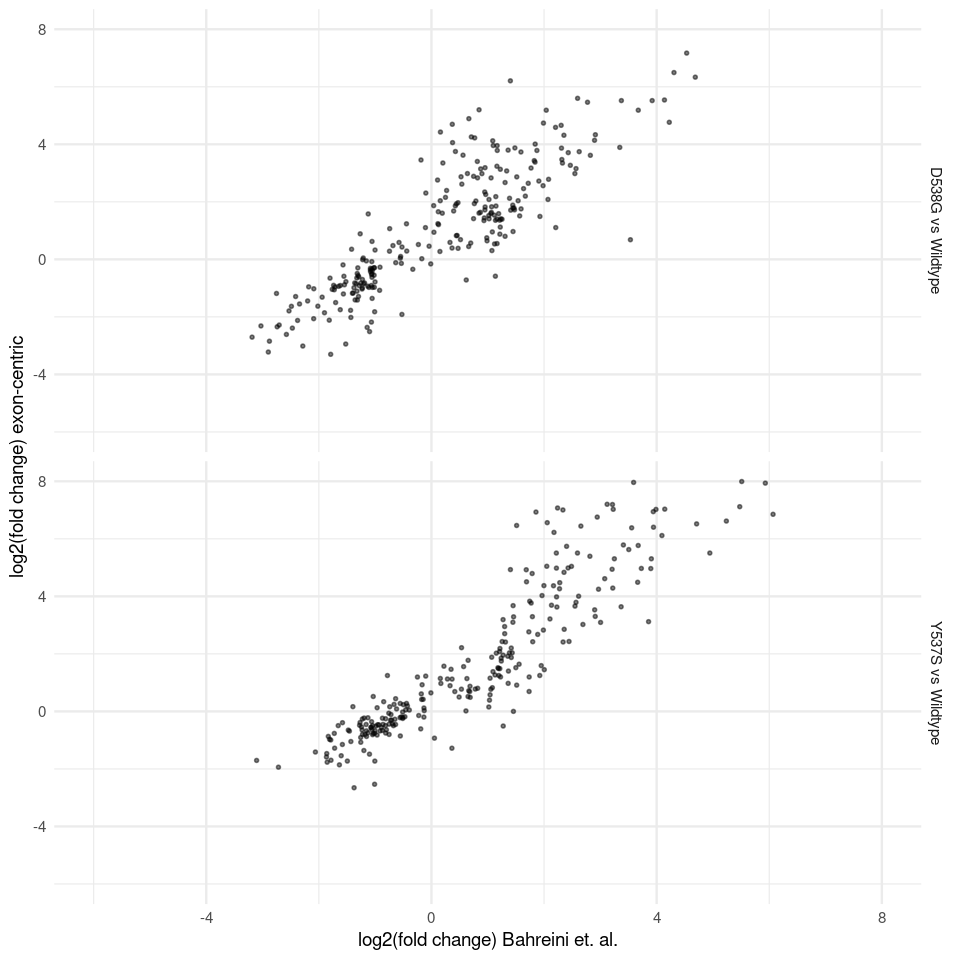

In [144]:
options(repr.plot.width=8, repr.plot.height=8)
counts_ratio <- left_join(genomic_counts, exonic_counts) %>%
    mutate(ratio = (exonic + 1) / (genomic + 1))

read_tsv("expression_matrix_exonic_nomask.hg38.fa.deseq.tidy.txt") %>%
  full_join(read_tsv("expression_matrix_exonic_nomask.hg38.fa.annotation.txt")) %>%
    filter(Contrast != "Estrogen vs Vehicle") %>%
    mutate(gene_id = stringr::str_extract(gene_id, "ENSG[0-9]+")) %>%
    left_join(bahreini_deg, on=c("Contrast", "gene_id")) %>% 
    filter(!is.na(Bahreini_adj_p_value)) %>%
    ggplot(aes(x=Bahreini_fold_change, y=log2fc)) + 
    geom_point(size=0.5, alpha=0.5) +
    scale_colour_viridis_c(name="log10(exon/genome-centric) counts") +
    facet_grid(Contrast~.) +
    xlim(-6, 8) +
    ylim(-6, 8) +
    theme_minimal() +
    ylab("log2(fold change) exon-centric") +
    xlab("log2(fold change) Bahreini et. al.")

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character()
)

See spec(...) for full column specifications.

`summarise()` ungrouping output (override with `.groups` argument)

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character()
)

See spec(...) for full column specifications.

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "gene_id"

Parsed with column specification:
cols(
  Contrast = col_character(),
  gene_id = col_character(),
  log10p = col_double(),
  log2fc = col_double(),
  baseMean = col_double(),
  log2fcSE = col_double(),
  stat = col_double()
)

Parsed with column specification:
cols(
  Contrast = col_character(),
  gene_id = col_character(),
  log10p = col_double(),
  log2fc = col_double(),
  ba

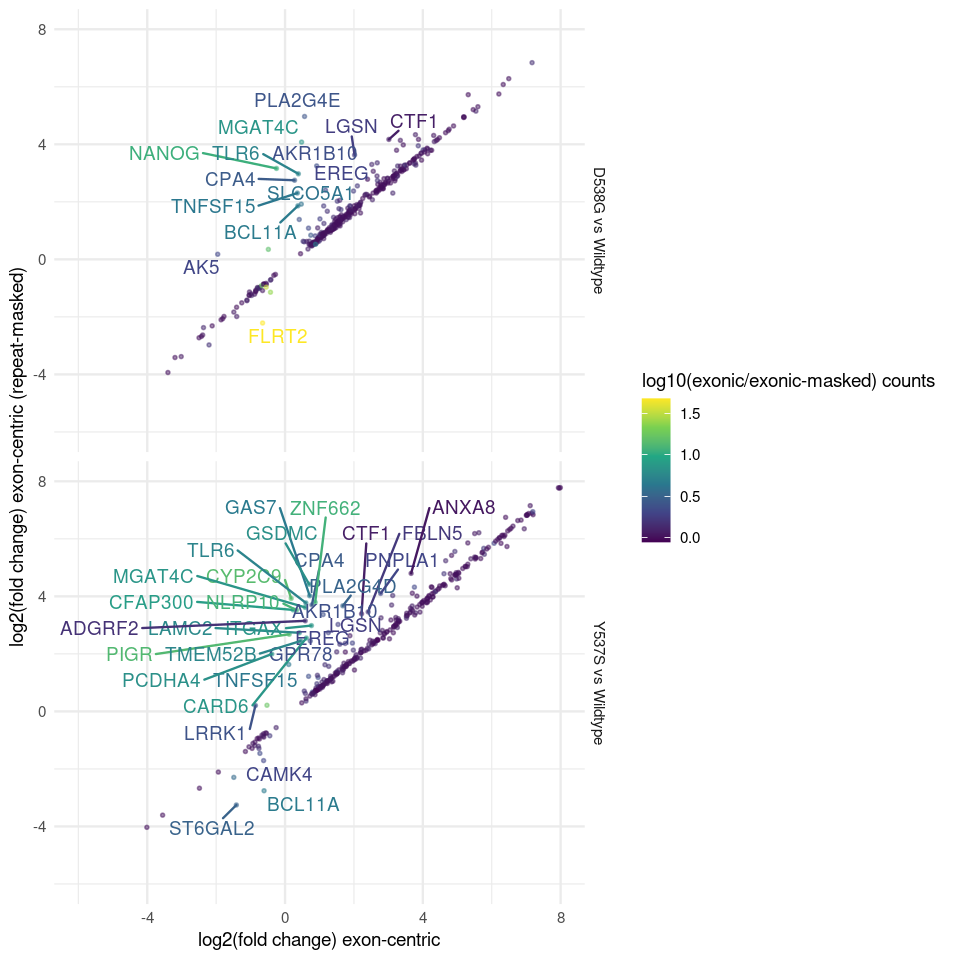

In [148]:
options(repr.plot.width=8, repr.plot.height=8)

exonic_counts <- read_tsv("expression_matrix_exonic.hg38.fa.counts.txt") %>%
    filter(biotype == "protein_coding") %>%
    select(-c(biotype, symbol, chrom, start, stop, length)) %>%
    gather(SampleID, count, -c(gene_id)) %>%
    group_by(gene_id) %>%
    summarize(exonic = median(count)) %>%
    select(c(gene_id, exonic))

unmasked_counts <- read_tsv("expression_matrix_exonic_nomask.hg38.fa.counts.txt") %>%
    filter(biotype == "protein_coding") %>%
    select(-c(biotype, symbol, chrom, start, stop, length)) %>%
    gather(SampleID, count, -c(gene_id)) %>%
    group_by(gene_id) %>%
    summarize(unmasked = median(count)) %>%
    select(c(gene_id, unmasked))

counts_ratio <- left_join(unmasked_counts, exonic_counts) %>%
    mutate(ratio = (unmasked + 1) / (exonic + 1))

read_tsv("expression_matrix_exonic_nomask.hg38.fa.deseq.tidy.txt") %>%
  full_join(read_tsv("expression_matrix_exonic.hg38.fa.deseq.tidy.txt"), by=c("gene_id"="gene_id", "Contrast"="Contrast")) %>%
  full_join(read_tsv("expression_matrix_exonic.hg38.fa.annotation.txt")) %>%
  full_join(counts_ratio) %>%
    filter(biotype == "protein_coding") %>% 
    filter(Contrast != "Estrogen vs Vehicle") %>%
    filter(gene_id %in% ligand_independent_genes$gene_id) %>%
    filter(log10p.x < -2 | log10p.y < -2) %>% 
    mutate(gene_id = stringr::str_extract(gene_id, "ENSG[0-9]+")) %>%
    left_join(bahreini_deg, on=c("Contrast", "gene_id")) %>% 
    #filter(!is.na(Bahreini_adj_p_value)) %>%
    mutate(diff = log2fc.x - log2fc.y) %>%
    mutate(label = ifelse(abs(diff) > 1, symbol, "")) %>%
    ggplot(aes(x=log2fc.x, y=log2fc.y, label=label, color=log10(ratio))) + 
    geom_point(size=0.5, alpha=0.5) +
    scale_colour_viridis_c(name="log10(exonic/exonic-masked) counts") +
    facet_grid(Contrast~.) +
    xlim(-6, 8) +
    ylim(-6, 8) +
    geom_text_repel() +
    theme_minimal() +
    ylab("log2(fold change) exon-centric (repeat-masked)") +
    xlab("log2(fold change) exon-centric")

In [84]:
ggsave("de_plot_nomask.png", device="png", width=8, height=12)

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_text_repel).”


Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character()
)

See spec(...) for full column specifications.

`summarise()` ungrouping output (override with `.groups` argument)

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character()
)

See spec(...) for full column specifications.

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "gene_id"

Parsed with column specification:
cols(
  Contrast = col_character(),
  gene_id = col_character(),
  log10p = col_double(),
  log2fc = col_double(),
  baseMean = col_double(),
  log2fcSE = col_double(),
  stat = col_double()
)

Parsed with column specification:
cols(
  Contrast = col_character(),
  gene_id = col_character(),
  log10p = col_double(),
  log2fc = col_double(),
  ba

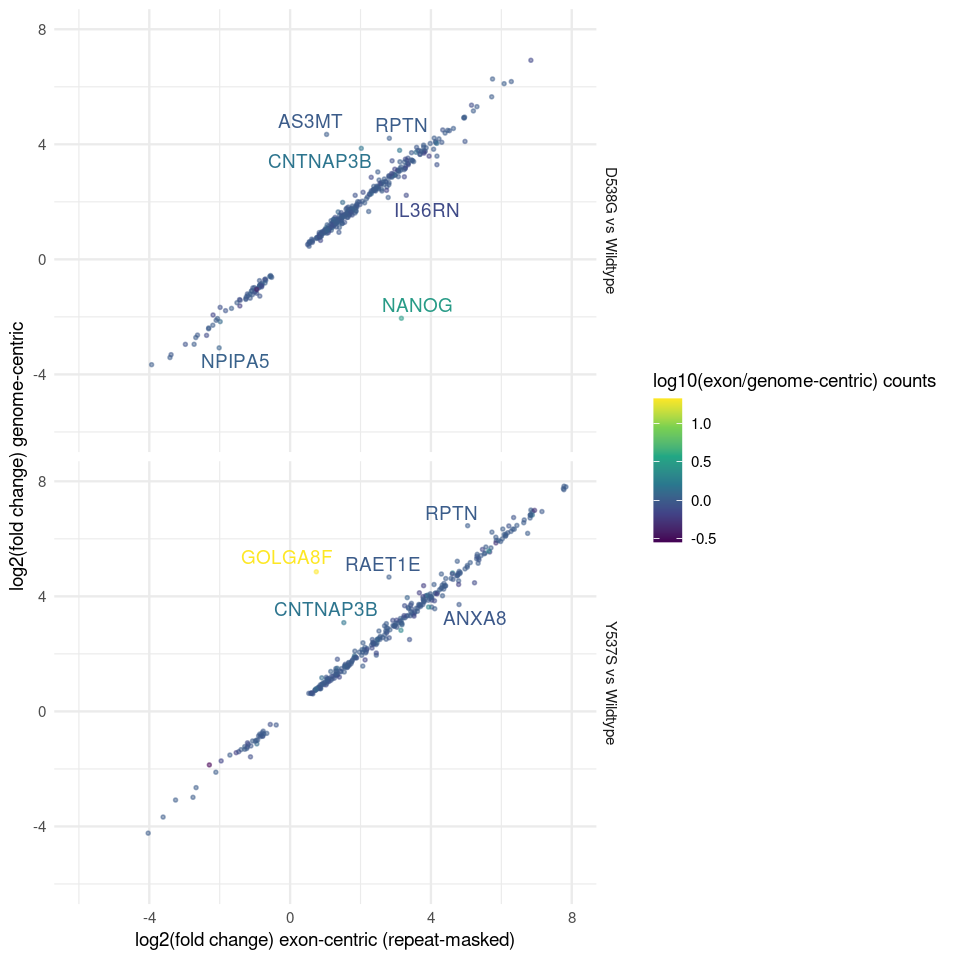

In [146]:
options(repr.plot.width=8, repr.plot.height=8)
exonic_counts <- read_tsv("expression_matrix_exonic.hg38.fa.counts.txt") %>%
    filter(biotype == "protein_coding") %>%
    select(-c(biotype, symbol, chrom, start, stop, length)) %>%
    gather(SampleID, count, -c(gene_id)) %>%
    group_by(gene_id) %>%
    summarize(exonic = median(count)) %>%
    select(c(gene_id, exonic))

genomic_counts <- read_tsv("expression_matrix_nomask.hg38.fa.counts.txt") %>%
    filter(biotype == "protein_coding") %>%
    select(-c(biotype, symbol, chrom, start, stop, length)) %>%
    gather(SampleID, count, -c(gene_id)) %>%
    group_by(gene_id) %>%
    summarize(genomic = median(count)) %>%
    select(c(gene_id, genomic))


counts_ratio <- left_join(genomic_counts, exonic_counts) %>%
    mutate(ratio = (exonic + 1) / (genomic + 1))

read_tsv("expression_matrix_exonic.hg38.fa.deseq.tidy.txt") %>%
  full_join(read_tsv("expression_matrix_nomask.hg38.fa.deseq.tidy.txt"), by=c("gene_id"="gene_id", "Contrast"="Contrast")) %>%
  full_join(read_tsv("expression_matrix_exonic.hg38.fa.annotation.txt")) %>%
  full_join(counts_ratio) %>%
    filter(Contrast != "Estrogen vs Vehicle") %>%
    filter(biotype == "protein_coding") %>% 
    filter(gene_id %in% ligand_independent_genes$gene_id) %>%
    filter(log10p.x < -2 | log10p.y < -2) %>% 
    mutate(gene_id = stringr::str_extract(gene_id, "ENSG[0-9]+")) %>%
    left_join(bahreini_deg, on=c("Contrast", "gene_id")) %>% 
    #filter(!is.na(Bahreini_adj_p_value)) %>%
    mutate(diff = log2fc.x - log2fc.y) %>%
    mutate(label = ifelse(abs(diff) > 1, symbol, "")) %>%
    ggplot(aes(x=log2fc.x, y=log2fc.y, label=label, color=log10(ratio))) + 
    geom_point(size=0.5, alpha=0.5) +
    scale_colour_viridis_c(name="log10(exon/genome-centric) counts") +
    facet_grid(Contrast~.) +
    xlim(-6, 8) +
    ylim(-6, 8) +
    geom_text_repel() +
    theme_minimal() +
    xlab("log2(fold change) exon-centric (repeat-masked)") +
    ylab("log2(fold change) genome-centric")

In [86]:
ggsave("de_plot.png", device="png", width=8, height=12)

Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_text_repel).”


In [87]:
deg <- read_tsv("expression_matrix_nomask.hg38.fa.deseq.tidy.txt")

Parsed with column specification:
cols(
  Contrast = col_character(),
  gene_id = col_character(),
  log10p = col_double(),
  log2fc = col_double(),
  baseMean = col_double(),
  log2fcSE = col_double(),
  stat = col_double()
)



In [88]:
annotation <- read_tsv("expression_matrix_exonic.hg38.fa.annotation.txt")

Parsed with column specification:
cols(
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character(),
  start = col_double(),
  stop = col_double(),
  length = col_double(),
  frac_masked = col_double()
)



Joining, by = "gene_id"

Joining, by = c("Contrast", "gene_id", "symbol")

Warning message:
“Removed 4952 rows containing missing values (geom_point).”
Warning message:
“Removed 4952 rows containing missing values (geom_text_repel).”


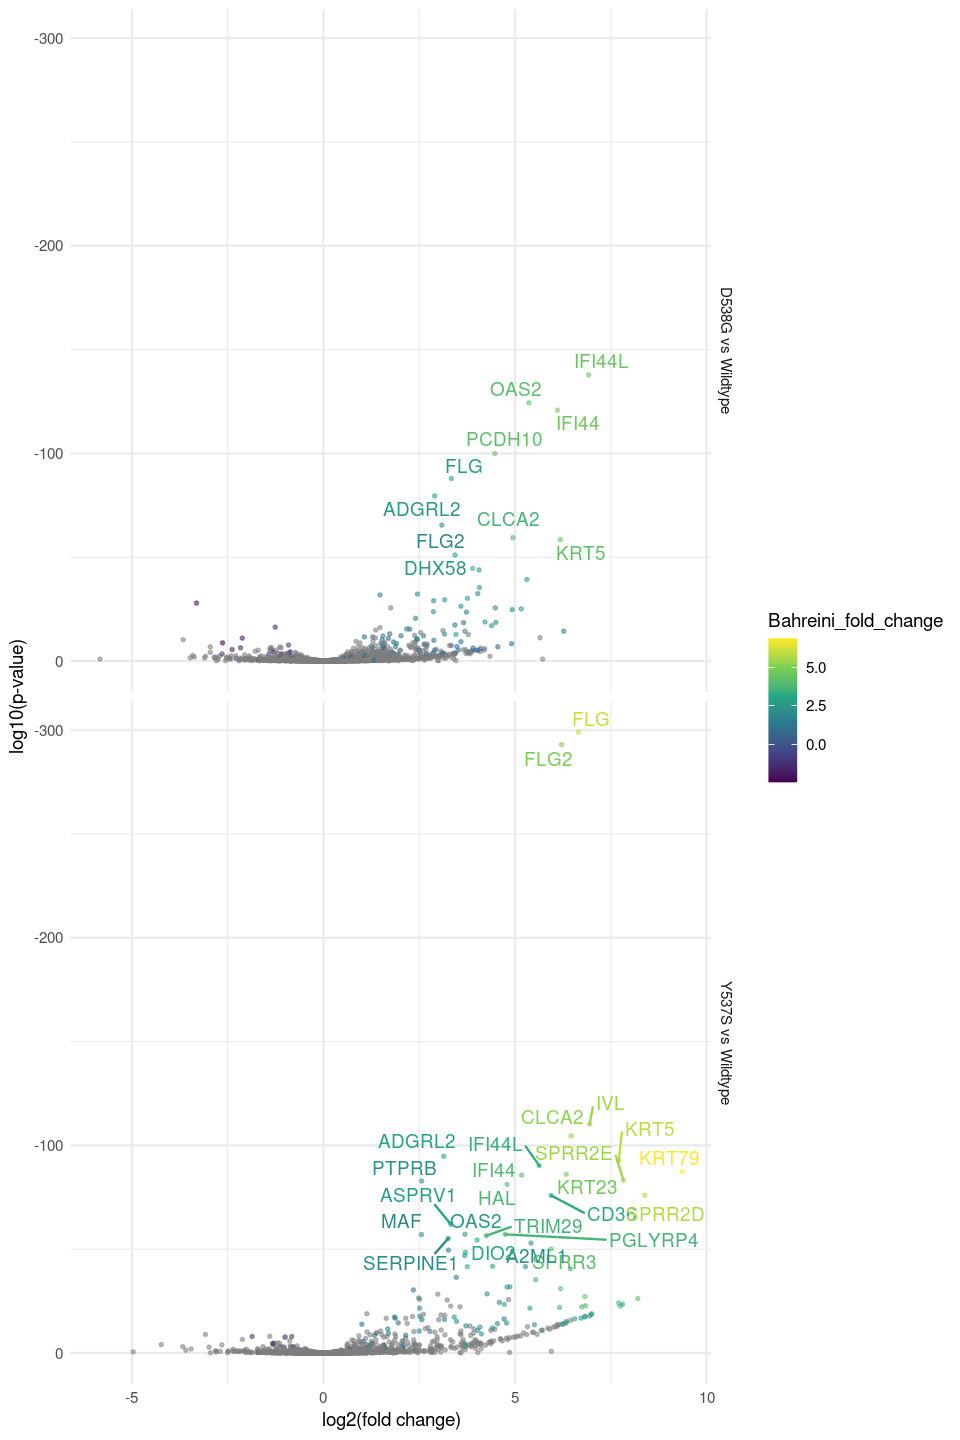

In [89]:
options(repr.plot.width=8, repr.plot.height=12)
deg %>%
    left_join(annotation) %>%
    filter(gene_id %in% ligand_independent_genes$gene_id) %>%
    mutate(gene_id = stringr::str_extract(gene_id, "ENSG[0-9]+")) %>%
    left_join(bahreini_deg, on=c("Contrast", "gene_id")) %>% 
    filter(biotype == "protein_coding") %>%
    filter(Contrast != "Estrogen vs Vehicle") %>%
    mutate(label = ifelse(log10p < -50, symbol, "")) %>% 
    ggplot(aes(log2fc, log10p, color=Bahreini_fold_change, label=label)) +
        geom_point(size=0.5, alpha=0.5) +
        geom_text_repel() + 
        scale_y_reverse() +
        scale_colour_viridis_c(name="fold-change Bahreini et al.") +
        facet_grid(Contrast ~ .) +
        theme_minimal()  +
        ylab("log10(p-value)") +
        xlab("log2(fold change)")

In [90]:
ggsave("volcano_plot.png", device="png", width=8, height=8)

Warning message:
“Removed 4952 rows containing missing values (geom_point).”
Warning message:
“Removed 4952 rows containing missing values (geom_text_repel).”


In [91]:
fingerprint <- read_tsv("fingerprint.txt")

Parsed with column specification:
cols(
  Sample1 = col_character(),
  Sample2 = col_character(),
  p_same = col_double(),
  Model1 = col_character(),
  Model2 = col_character(),
  psame = col_double(),
  pdiff = col_double(),
  nummatch = col_double(),
  nummismatch = col_double(),
  numopphom = col_double(),
  numhettohom = col_double(),
  numhomtohet = col_double()
)



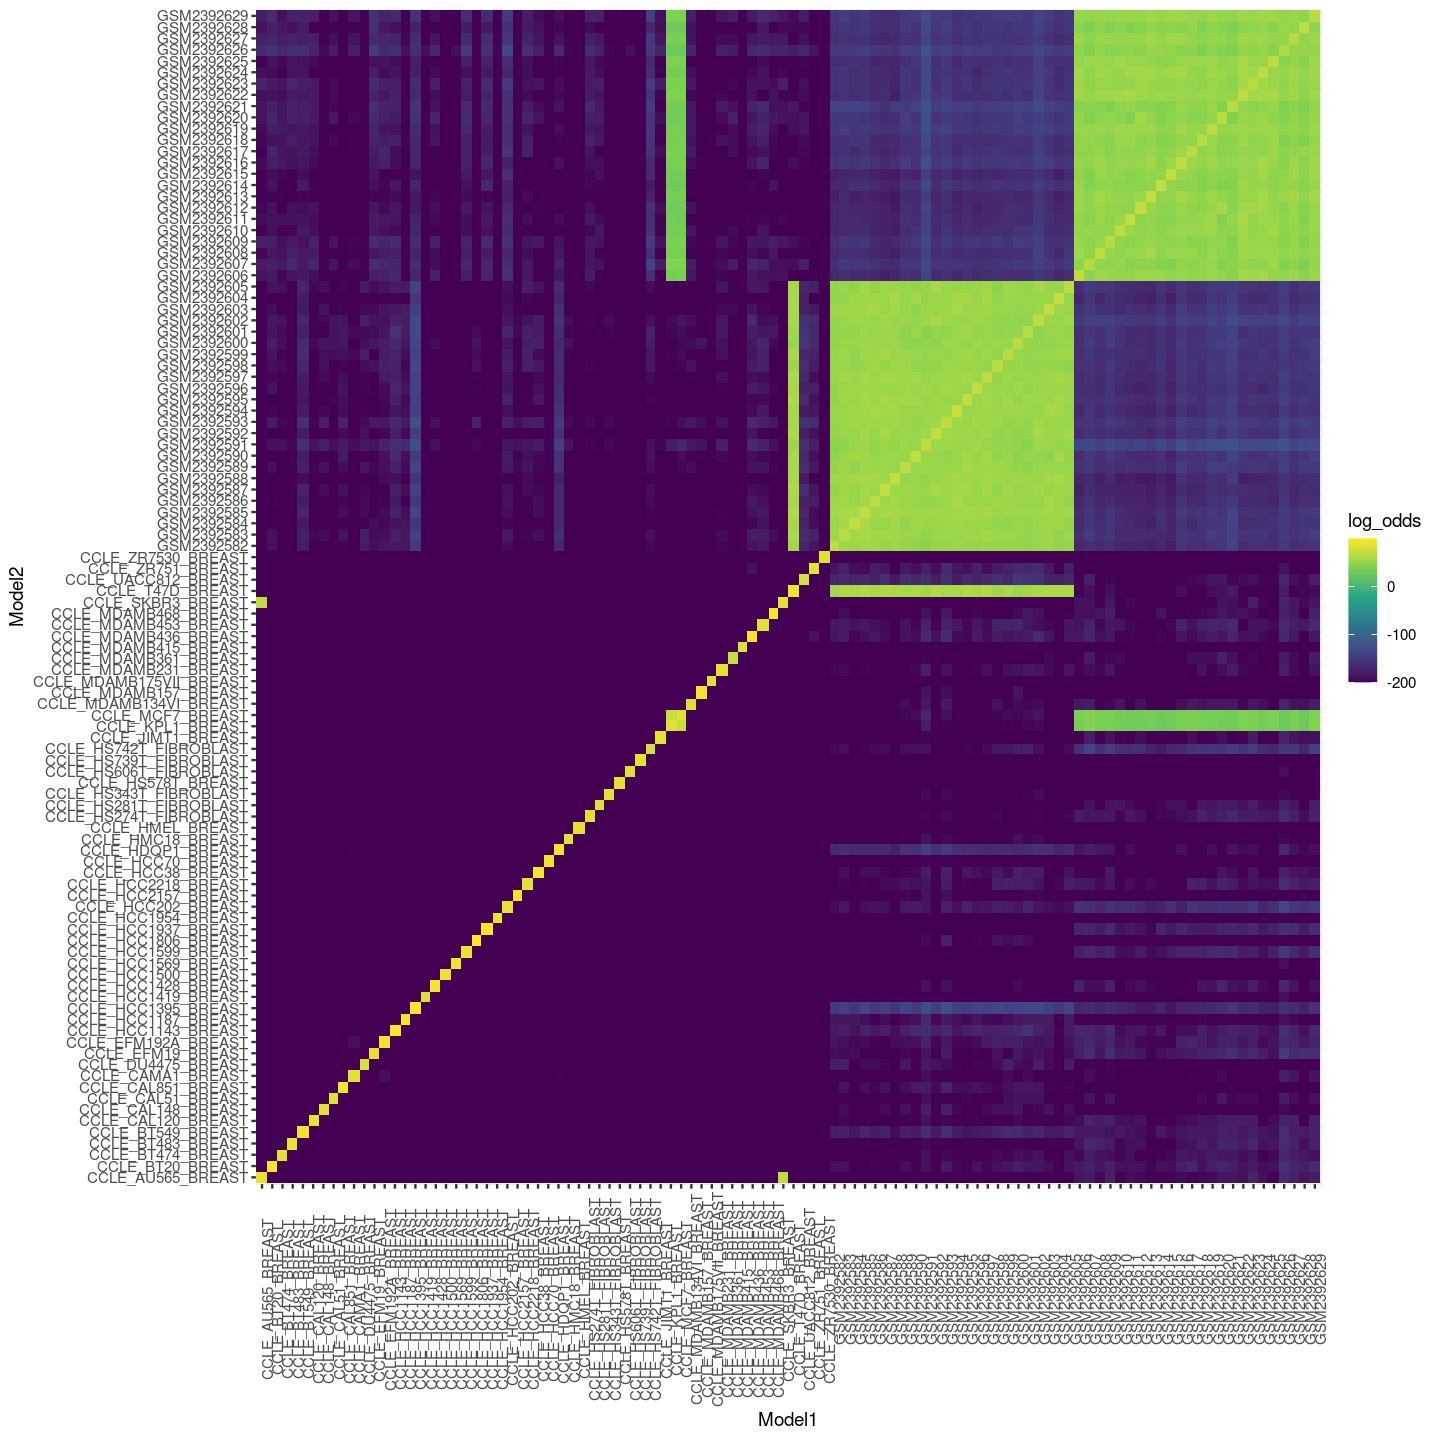

In [92]:
options(repr.plot.width=12, repr.plot.height=12)
fingerprint %>%
    mutate(log_odds = case_when(
        p_same < -200 ~ -200,
        TRUE ~ p_same
    )) %>%
    ggplot(aes(x=Model1, y=Model2, fill=log_odds)) +
    geom_tile() +
    scale_fill_viridis_c(name="log odds") +
    theme(axis.text.x = element_text(angle = 90))

In [93]:
ggsave("fingerprint_plot.png", device="png", width=12, height=12)

In [94]:
genomic_bins <- read_tsv("expression_matrix_nomask.hg38.fa.counts.txt") %>%
    filter(biotype == "protein_coding") %>%
    select(-c(biotype, symbol, chrom, start, stop, length)) %>%
    gather(SampleID, count, -c(gene_id)) %>%
    group_by(gene_id) %>%
    summarize(med_count_genomic = median(count)) %>% 
    mutate(bin = cut(med_count_genomic, breaks=c(0, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6), include.lowest
=T)) 
    

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character()
)

See spec(...) for full column specifications.

`summarise()` ungrouping output (override with `.groups` argument)



In [152]:
exonic_bins <- read_tsv("expression_matrix_exonic.hg38.fa.counts.txt") %>%
    filter(biotype == "protein_coding") %>%
    select(-c(biotype, symbol, chrom, start, stop, length)) %>%
    gather(SampleID, count, -c(gene_id)) %>%
    group_by(gene_id) %>%
    summarize(med_count_exonic = median(count)) %>% 
    mutate(bin = cut(med_count_exonic, breaks=c(0, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6), include.lowest
=T)) 
    

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character()
)

See spec(...) for full column specifications.

`summarise()` ungrouping output (override with `.groups` argument)



In [96]:
exonic_nomask_bins <- read_tsv("expression_matrix_exonic_nomask.hg38.fa.counts.txt") %>%
    filter(biotype == "protein_coding") %>%
    select(-c(biotype, symbol, chrom, start, stop, length)) %>%
    gather(SampleID, count, -c(gene_id)) %>%
    group_by(gene_id) %>%
    summarize(med_count_nomask = median(count)) %>% 
    mutate(bin_nomask = cut(med_count_nomask, breaks=c(0, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6), include.lowest
=T)) 
    

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character()
)

See spec(...) for full column specifications.

`summarise()` ungrouping output (override with `.groups` argument)



Joining, by = "gene_id"

Parsed with column specification:
cols(
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character(),
  start = col_double(),
  stop = col_double(),
  length = col_double(),
  frac_masked = col_double()
)

Joining, by = "gene_id"

Warning message in trans$transform(limits):
“NaNs produced”
Warning message in trans$transform(limits):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 44880 rows containing missing values (geom_point).”


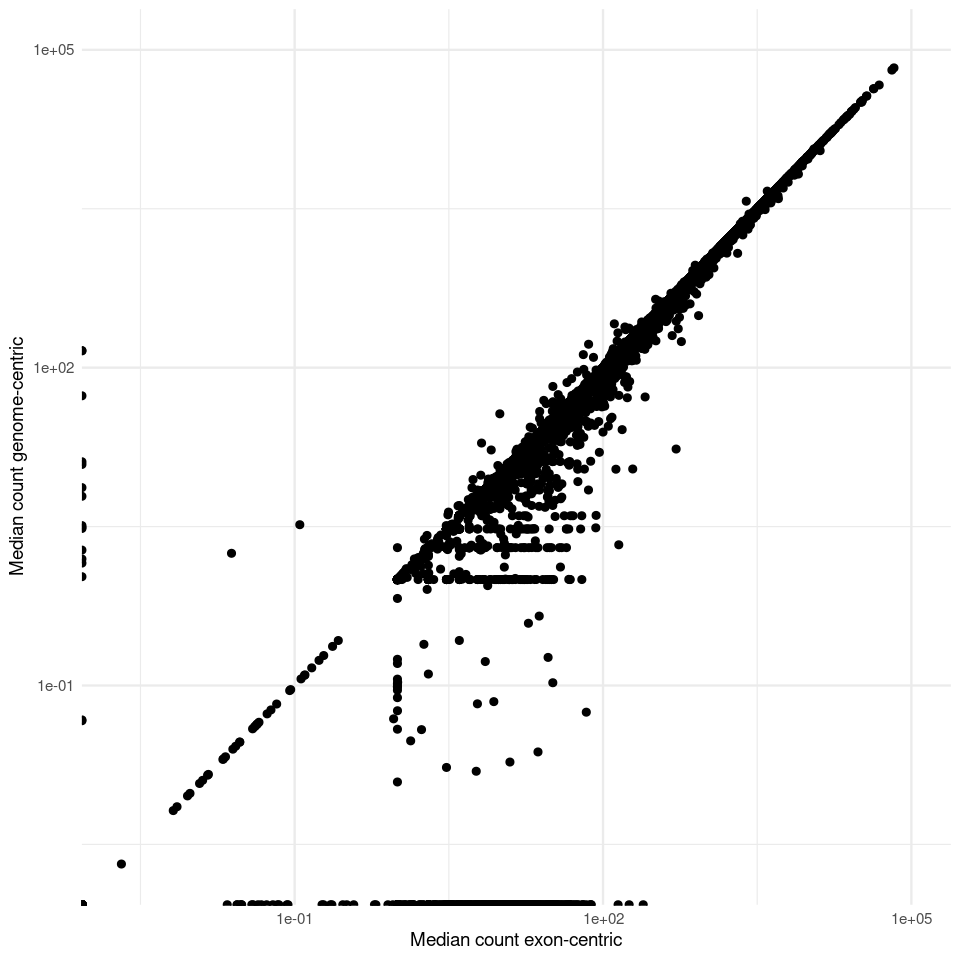

In [97]:
options(repr.plot.width=8, repr.plot.height=8)
inner_join(exonic_nomask_bins, genomic_bins) %>%
    full_join(read_tsv("expression_matrix_exonic.hg38.fa.annotation.txt")) %>%
    ggplot(aes(med_count_nomask, med_count_genomic)) +
        geom_point() +
        scale_x_log10(limits=c(-1,1e5)) +
        scale_y_log10(limits=c(-1,1e5)) +
        theme_minimal() +
        xlab("Median count exon-centric") +
        ylab("Median count genome-centric")

Joining, by = "gene_id"

Parsed with column specification:
cols(
  gene_id = col_character(),
  biotype = col_character(),
  symbol = col_character(),
  chrom = col_character(),
  start = col_double(),
  stop = col_double(),
  length = col_double(),
  frac_masked = col_double()
)

Joining, by = "gene_id"

Warning message in trans$transform(limits):
“NaNs produced”
Warning message in trans$transform(limits):
“NaNs produced”
Warning message:
“Removed 44880 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 44880 rows containing non-finite values (stat_bin2d).”


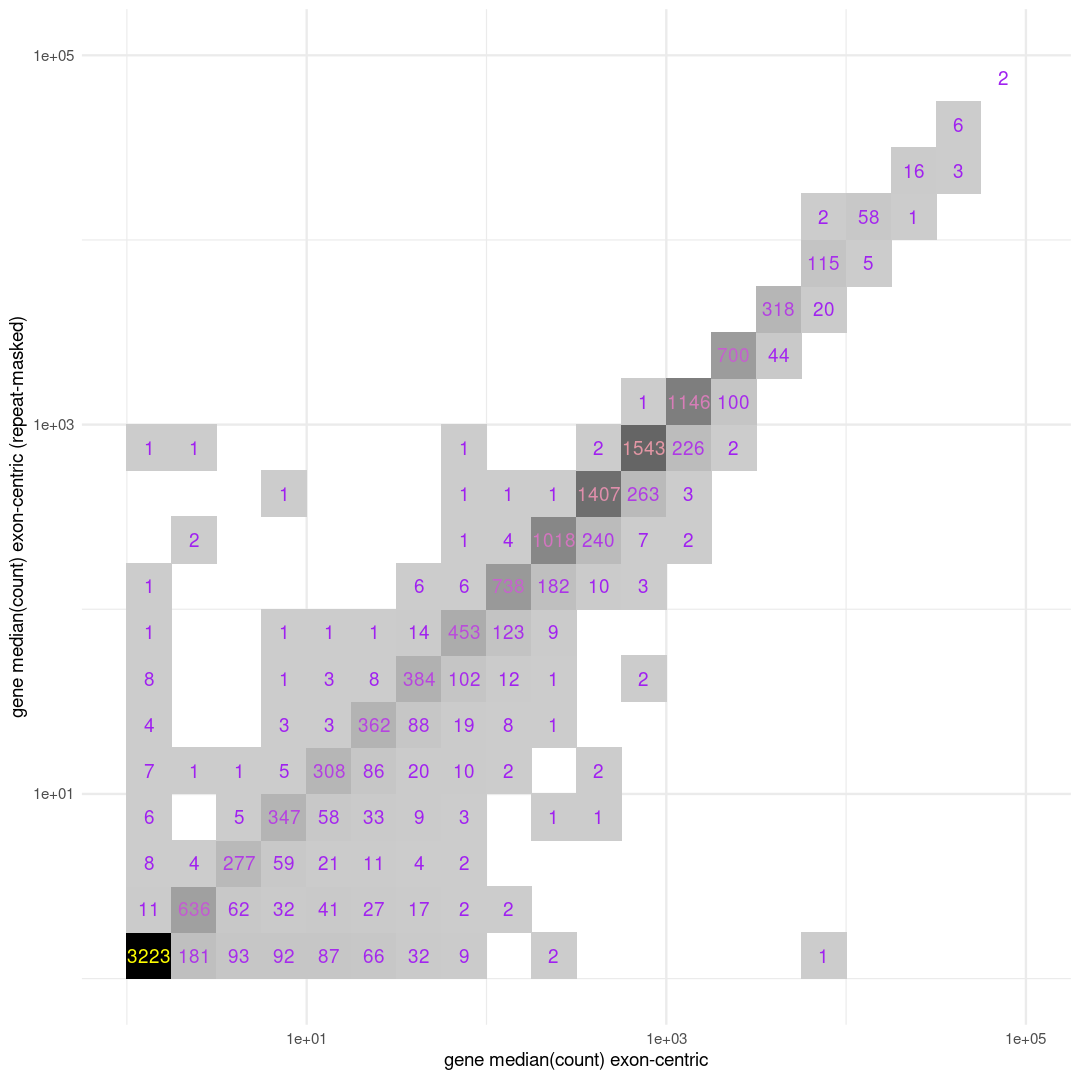

In [153]:
options(repr.plot.width=9, repr.plot.height=9)
inner_join(exonic_nomask_bins, exonic_bins) %>%
    full_join(read_tsv("expression_matrix_exonic.hg38.fa.annotation.txt")) %>%
    ggplot(aes(med_count_nomask + 1, med_count_exonic + 1)) +
        geom_bin2d(binwidth=.25) + 
        stat_bin2d(geom = "text", aes(label = ..count.., color = ..count..), binwidth=.25) + 
        scale_x_log10(limits=c(-1,1e5)) +
        scale_y_log10(limits=c(-1,1e5)) +
        scale_fill_gradient(high="black", low="grey80") +
        scale_color_gradient(low="purple", high="yellow") +
        theme_minimal() +
        xlab("gene median(count) exon-centric") +
        ylab("gene median(count) exon-centric (repeat-masked)") + 
        theme(legend.position = "none")

In [99]:
ggsave("repeatmask_plot.png", device="png", width=8, height=8)

Warning message:
“Removed 44880 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 44880 rows containing non-finite values (stat_bin2d).”
